## This is an employee database of an organization with various departments

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('employee.csv')

In [72]:
#To begin, let's show the first few rows to get things started
df.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,Year,Year_2,YEAR_1,YEAR_2,EMPLOYMENT_TENURE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,2006,2012.0,2006,2012.0,6.0
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,2000,2010.0,2000,2010.0,10.0
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,2015,2015.0,2015,2015.0,0.0
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,1982,1991.0,1982,1991.0,9.0
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,1989,1994.0,1989,1994.0,5.0


In [8]:
#let's show the last 5 in the row
df.tail()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,09/06/2014,09/06/2015
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,02/09/2003,06/10/2013
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,13/10/2014,13/10/2015
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,20/01/2009,02/07/2011
1999,1999,FIRE FIGHTER,Houston Fire Department (HFD),51194.0,Hispanic/Latino,Full Time,Male,Active,12/01/2009,12/07/2010


#Now that the dataset has been successfully loaded, let's perform some initial Exploratory Data Analysis to understand the distribution of trends in the Employees dataset beginning by checking for missing values, duplicates and then proceed to analyze.

In [9]:
df.duplicated().sum()

0

In [10]:
#Now that we're sure there's no duplicate, we are going to chech if there's any missing value

df.isna().sum()       

UNIQUE_ID              0
POSITION_TITLE         0
DEPARTMENT             0
BASE_SALARY          114
RACE                  35
EMPLOYMENT_TYPE        0
GENDER                 0
EMPLOYMENT_STATUS      0
HIRE_DATE              0
JOB_DATE               3
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNIQUE_ID          2000 non-null   int64  
 1   POSITION_TITLE     2000 non-null   object 
 2   DEPARTMENT         2000 non-null   object 
 3   BASE_SALARY        1886 non-null   float64
 4   RACE               1965 non-null   object 
 5   EMPLOYMENT_TYPE    2000 non-null   object 
 6   GENDER             2000 non-null   object 
 7   EMPLOYMENT_STATUS  2000 non-null   object 
 8   HIRE_DATE          2000 non-null   object 
 9   JOB_DATE           1997 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 156.4+ KB


In [12]:
df.describe()

,UNIQUE_ID,BASE_SALARY
count,2000.000000,1886.000000
mean,999.500000,55767.931601
std,577.494589,21693.706679
min,0.000000,24960.000000
25%,499.750000,40170.000000
50%,999.500000,54461.000000
75%,1499.250000,66614.000000
max,1999.000000,275000.000000


In [13]:
#let's keep a duplicate of the original data for future purposes

df_copy= df.copy()

In [14]:
#Distribution by Race/Ethnicity 
#Racial composition of the workforce

df['RACE'].value_counts().sort_index()

RACE
American Indian or Alaskan Native     11
Asian/Pacific Islander               107
Black or African American            700
Hispanic/Latino                      480
Others                                 2
White                                665
Name: count, dtype: int64

In [15]:
#check for the race percentage of the employees that makes up the organization

racial_composition= df['RACE'].value_counts(normalize= True) * 100

In [16]:

#Let's check if there are any significant disparities in the representation of different racial/ethnic groups across departments

racial_composition

RACE
Black or African American            35.623410
White                                33.842239
Hispanic/Latino                      24.427481
Asian/Pacific Islander                5.445293
American Indian or Alaskan Native     0.559796
Others                                0.101781
Name: proportion, dtype: float64

### Observation : There are obvious dispairities in the representation of different racial groups across departments


In [17]:
df.groupby('DEPARTMENT')['RACE'].count().sort_values


<bound method Series.sort_values of DEPARTMENT
Admn. & Regulatory Affairs         26
City Controller's Office            5
City Council                        9
Convention and Entertainment        1
Dept of Neighborhoods (DON)        17
Finance                             9
Fleet Management Department        34
General Services Department        22
Health & Human Services           108
Housing and Community Devp.        22
Houston Airport System (HAS)      103
Houston Emergency Center (HEC)     22
Houston Fire Department (HFD)     379
Houston Information Tech Svcs       9
Houston Police Department-HPD     633
Human Resources Dept.              24
Legal Department                   17
Library                            34
Mayor's Office                      5
Municipal Courts Department        28
Parks & Recreation                 69
Planning & Development              7
Public Works & Engineering-PWE    343
Solid Waste Management             39
Name: RACE, dtype: int64>

In [18]:
#Gender Representation within the organization

gender_dist = df['GENDER'].value_counts()

In [19]:
gender_dist

GENDER
Male      1397
Female     603
Name: count, dtype: int64

<Figure size 600x400 with 0 Axes>

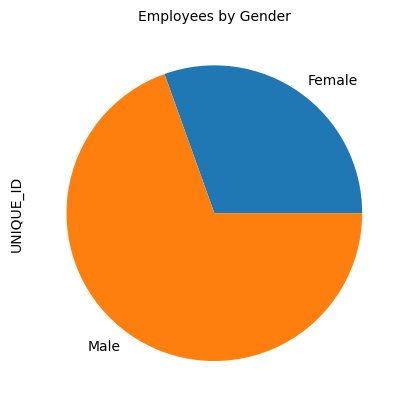

<Figure size 600x400 with 0 Axes>

In [20]:
#Let's find out if there are any gender imbalances in certain departments

plt.title('Employees by Gender', fontsize = 10)
df.groupby('GENDER')['UNIQUE_ID'].sum().plot(kind = 'pie')

plt.figure(figsize = (6, 4)) 


In [21]:
#Employment Type Distribution

df.groupby('DEPARTMENT')['GENDER'].value_counts()

DEPARTMENT                      GENDER
Admn. & Regulatory Affairs      Female     22
                                Male        7
City Controller's Office        Female      4
                                Male        1
City Council                    Female      7
                                Male        4
Convention and Entertainment    Female      1
Dept of Neighborhoods (DON)     Male        9
                                Female      8
Finance                         Male        6
                                Female      4
Fleet Management Department     Male       33
                                Female      3
General Services Department     Male       20
                                Female      2
Health & Human Services         Female     83
                                Male       27
Housing and Community Devp.     Female     16
                                Male        6
Houston Airport System (HAS)    Male       70
                                Female   

#Let's find out the  proportion of employees that are full-time, part-time, or contract workers

In [22]:
#check the employment type of the employees

df['EMPLOYMENT_TYPE'].value_counts(normalize = True) * 100

EMPLOYMENT_TYPE
Full Time            97.70
Part Time             1.00
Temporary             0.45
HFD Deferred Term     0.45
Part Time 30          0.40
Name: proportion, dtype: float64

In [54]:
#Observation : Full time makes the most part of the organization

full_time = df[df['EMPLOYMENT_TYPE'] == 'Full Time']
part_time = df[df['EMPLOYMENT_TYPE'] == 'Part Time']
contract = df[df['EMPLOYMENT_TYPE'] == 'Temporary']

In [26]:
#Let's find out if there's a difference among employment types across departments

df.groupby('EMPLOYMENT_TYPE')['DEPARTMENT'].value_counts()

EMPLOYMENT_TYPE    DEPARTMENT                    
Full Time          Houston Police Department-HPD     638
                   Houston Fire Department (HFD)     375
                   Public Works & Engineering-PWE    341
                   Houston Airport System (HAS)      106
                   Health & Human Services           106
                   Parks & Recreation                 55
                   Solid Waste Management             43
                   Fleet Management Department        36
                   Library                            30
                   Admn. & Regulatory Affairs         29
                   Municipal Courts Department        26
                   Human Resources Dept.              24
                   Houston Emergency Center (HEC)     23
                   General Services Department        22
                   Housing and Community Devp.        20
                   Dept of Neighborhoods (DON)        17
                   Legal Department   

#Age distribution of employees within the organization

#There are no age-related trends in job titles or salary levels

In [65]:
#Tenure Analysis
##Let's find out the distribution of employee tenure (length of employment) within the organization?

df['HIRE_DATE'] = pd.to_datetime(df['HIRE_DATE'],dayfirst = True)
df['YEAR_1'] = df['HIRE_DATE'].dt.year

df['JOB_DATE'] = pd.to_datetime(df['JOB_DATE'],dayfirst = True)
df['YEAR_2'] = df['JOB_DATE'].dt.year

df['EMPLOYMENT_TENURE'] = df['YEAR_2'] - df['YEAR_1']

In [59]:
df.head(2)

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,Year,Year_2,YEAR_1,YEAR_2,EMPLOYMENT_TENURE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,2006,2012.0,2006,2012.0,6.0
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,2000,2010.0,2000,2010.0,10.0


In [71]:
#Now let's check if there's differences in tenure between different demographic group or departments

df.groupby('DEPARTMENT')['EMPLOYMENT_TENURE'].count().sort_values

<bound method Series.sort_values of DEPARTMENT
Admn. & Regulatory Affairs         28
City Controller's Office            5
City Council                       11
Convention and Entertainment        1
Dept of Neighborhoods (DON)        17
Finance                            10
Fleet Management Department        36
General Services Department        22
Health & Human Services           110
Housing and Community Devp.        22
Houston Airport System (HAS)      106
Houston Emergency Center (HEC)     23
Houston Fire Department (HFD)     384
Houston Information Tech Svcs       9
Houston Police Department-HPD     638
Human Resources Dept.              24
Legal Department                   17
Library                            35
Mayor's Office                      5
Municipal Courts Department        28
Parks & Recreation                 74
Planning & Development              7
Public Works & Engineering-PWE    343
Solid Waste Management             42
Name: EMPLOYMENT_TENURE, dtype: int64>

In [47]:
#Let's get the distribution of base salaries across the organization? (mean, mode, median)

df.groupby('DEPARTMENT')['BASE_SALARY'].describe()

,count,mean,std,min,25%,50%,75%,max
DEPARTMENT,,,,,,,,
Admn. & Regulatory Affairs,29.0,50890.551724,28918.748108,27581.0,33550.00,37710.0,57221.00,140416.0
City Controller's Office,5.0,55711.600000,8014.781176,42640.0,55536.00,57054.0,59077.00,64251.0
City Council,9.0,59089.222222,19937.971002,35837.0,45000.00,54000.0,62983.00,100000.0
Convention and Entertainment,1.0,38397.000000,NaN,38397.0,38397.00,38397.0,38397.00,38397.0
Dept of Neighborhoods (DON),17.0,47092.882353,15775.399111,26125.0,38210.00,43742.0,52884.00,89221.0
Finance,10.0,79650.300000,15968.431601,46963.0,73415.00,80542.0,92863.75,96272.0
Fleet Management Department,36.0,43994.305556,17182.345048,27539.0,32364.50,44158.0,49378.25,125884.0
General Services Department,22.0,51295.818182,22496.379805,26125.0,35547.00,42473.5,72417.00,89194.0
Health & Human Services,106.0,51305.933962,23026.516723,26125.0,34335.50,46717.0,59578.00,180416.0


 ### differences in salaries between different demographic groups (e.g., race, gender)

In [ ]:
df.head(2)

In [ ]:
df.groupby('RACE')['BASE_SALARY'].sum().sort_values()

In [ ]:
df.groupby('GENDER')['BASE_SALARY'].sum().sort_values()

##  Observation :
#There is about times two of the number of male than female in the organization as well as racial bias hence there's a huge difference        between the race and gender salaries

## Average Salary by Department/Position

In [ ]:
df.groupby('DEPARTMENT')['BASE_SALARY'].mean().sort_values()

In [ ]:
df.groupby('BASE_SALARY')['POSITION_TITLE'].sum().sort_values(ascending = False)